<img style="float: right; margin: 0px 0px 15px 15px;" src="https://pbs.twimg.com/profile_images/473631107229831168/uaXgXIQW_400x400.jpeg" width="200px" height="100px" />


# Proyecto 1. Calculando el precio futuro de una acción.

>En el siguiente proyecto se pretende predecir el comportamiento de acciones a través de un algoritmo usando el lenguaje de programación de python y sus diferentes librerías.




<font color="PURPLE">**INTEGRANTES:**</font>

* Paulina Milenka Glez Manrique.
* Francisco Rodríguez Ramírez.
* Marcos Ortíz Tirado Miranda.


## 1.2 Objetivos.

#### 1.2.1 Objetivo general.

>Este análisis se hace con el objeto de poder estimar los precios futuros no solo de Amazon sino de cualquier acción, con el fin de poder tomar decisiones basadas en un estudio del modelo y su comportamiento.

#### 1.2.2 Objetivo específico.

>La acción a analizar es Amazon, tomando 60 datos históricos mensuales del precio de cierre de 01 de marzo del 2013 al 01 de febrero del 2018. Con este análisis veremos y analizaremos a cómo estará el valor de la acción dentro de un mes y un año.

### 1.3 Modelo que representa el problema.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data_file = 'AMZN.csv.'
data = pd.read_csv(data_file, header=None)

In [4]:
data

,0,1
0,1,266.489990
1,2,253.809998
2,3,269.200012
3,4,277.690002
4,5,301.220001
5,6,280.980011
6,7,312.640015
7,8,364.029999
8,9,393.619995
9,10,398.790009


### 1.4 Simulaciones.

In [5]:
x = data.iloc[:, 0].values
y = data.iloc[:, 1].values

In [6]:
def fun_obj(B, x, y, n):
    return np.mean((y-np.array([x**i for i in range(n+1)]).T.dot(B))**2)

In [7]:
import scipy.optimize as opt

In [9]:
B01 = np.zeros(2)
ajuste1 = opt.minimize(fun_obj, B01, args=(x,y,1))
B02 = np.zeros(3)
ajuste2 = opt.minimize(fun_obj, B02, args=(x,y,2))
B03 = np.zeros(4)
ajuste3 = opt.minimize(fun_obj, B03, args=(x,y,3))
B04 = np. zeros(5)
ajuste4 = opt.minimize(fun_obj,B04,args=(x,y,4))
B05 = np. zeros(6)
ajuste5 = opt.minimize(fun_obj,B05,args=(x,y,5))

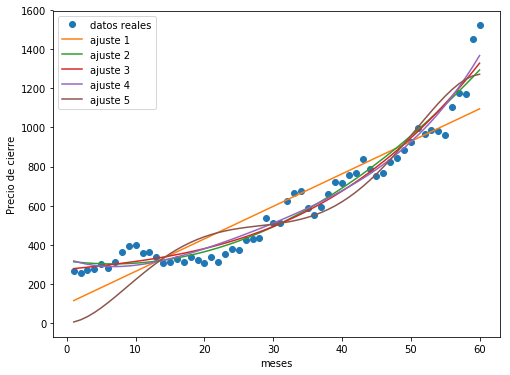

In [13]:
yhat1 = ajuste1.x[0]+ajuste1.x[1]*x
yhat2 = ajuste2.x[0]+ajuste2.x[1]*x+ajuste2.x[2]*x**2
yhat3 = ajuste3.x[0]+ajuste3.x[1]*x+ajuste3.x[2]*x**2+ajuste3.x[3]*x**3
yhat4= ajuste4.x[0]+ajuste4.x[1]*x+ajuste4.x[2]*x**2+ajuste4.x[3]*x**3+ajuste4.x[4]*x**4 
yhat5 = ajuste5.x[0]+ajuste5.x[1]*x+ajuste5.x[2]*x**2+ajuste5.x[3]*x**3+ajuste5.x[4]*x**4+ajuste5.x[5]*x**5

plt.figure(figsize=(8,6))
plt.plot(x, y,"o" ,label = 'datos reales')
plt.plot(x, yhat1, label = 'ajuste 1')
plt.plot(x, yhat2, label = 'ajuste 2')
plt.plot(x, yhat3, label = 'ajuste 3')
plt.plot(x,yhat4,label= "ajuste 4" )
plt.plot(x,yhat5, label ="ajuste 5")
plt.xlabel('meses')
plt.ylabel('Precio de cierre')
plt.legend(loc='best')
plt.show()

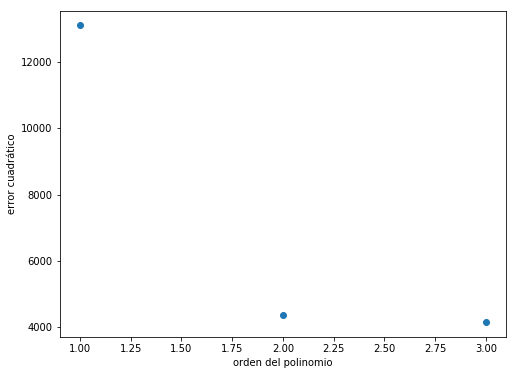

In [10]:
error1 = np.mean((y-yhat1)**2)
error2 = np.mean((y-yhat2)**2)
error3 = np.mean((y-yhat3)**2)

plt.figure(figsize=(8,6))
plt.plot([1,2,3],[error1,error2,error3], 'o')
plt.xlabel('orden del polinomio')
plt.ylabel('error cuadrático')
plt.show()

### 1.5 Visualización de resultados de simulación.

### 1.6 Conclusiones.

### 1.7 Referencias.